In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas_datareader
import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
start = datetime.datetime(2014,1,14)
end = datetime.datetime(2018,5,18)
andstock = web.DataReader("BSE/BOM500012",'quandl',start,end)

In [7]:
andstock.head()

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2018-05-18,59.00,59.35,57.80,58.05,58.39,37149.0,132.0,2169092.0,31402.0,84.53,1.55,-0.95
2018-05-17,59.30,59.40,57.85,58.70,58.54,30861.0,140.0,1806540.0,20111.0,65.17,1.55,-0.60
2018-05-16,57.70,58.00,57.00,57.55,57.53,22143.0,119.0,1273909.0,15632.0,70.60,1.00,-0.15
2018-05-15,58.45,61.60,57.90,58.10,60.00,81427.0,305.0,4885659.0,61815.0,75.91,3.70,-0.35
2018-05-14,58.55,59.45,57.40,57.60,58.09,25242.0,136.0,1466260.0,20776.0,82.31,2.05,-0.95


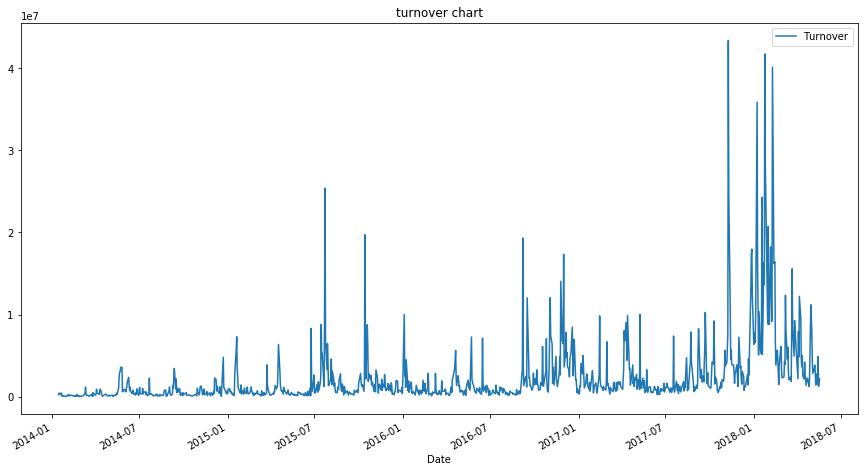

In [18]:
andstock['TotalTurnover'].plot(label='Turnover',figsize=(15,8),title=('turnover chart'))
plt.legend()

In [9]:
andstock['TotalTurnover'].argmax()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2017-11-09 00:00:00')

In [10]:
andstock['TotalTurnover'].mean()

2226499.714285714

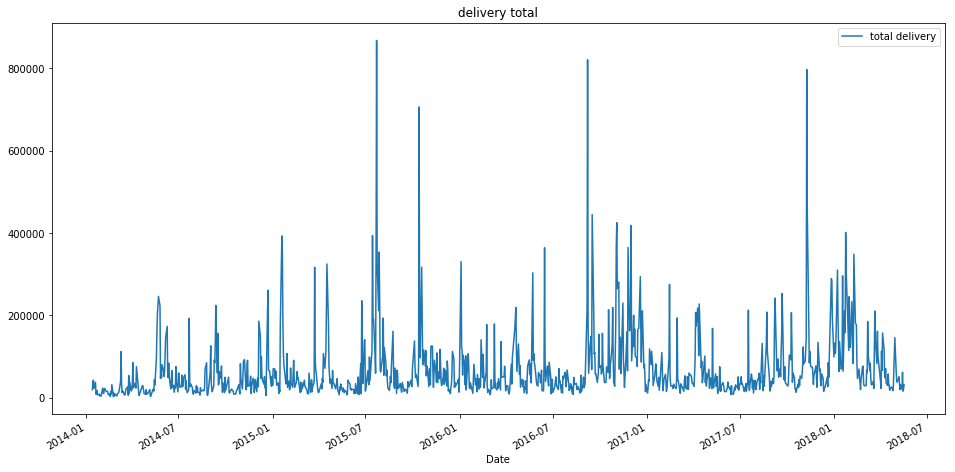

In [11]:
andstock['DeliverableQuantity'].plot(label='total delivery',figsize=(16,8),title='delivery total')
plt.legend()

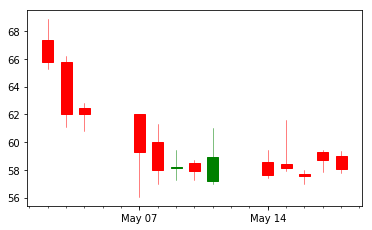

In [12]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
andstock_reset = andstock.loc['2018-05':'2018-05'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
andstock_reset['date_ax'] = andstock_reset['Date'].apply(lambda date: date2num(date))
andstock_values = [tuple(vals) for vals in andstock_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, andstock_values, width=0.6, colorup='g',colordown='r');

In [13]:
andstock['return'] = andstock['Close'].pct_change(1)

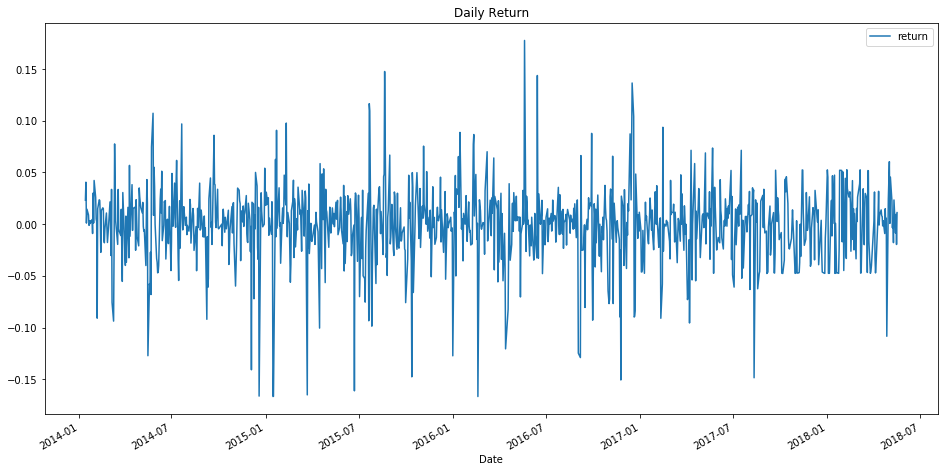

In [14]:
andstock['return'].plot(label = 'return',figsize=(16,8),title='Daily Return')
plt.legend()

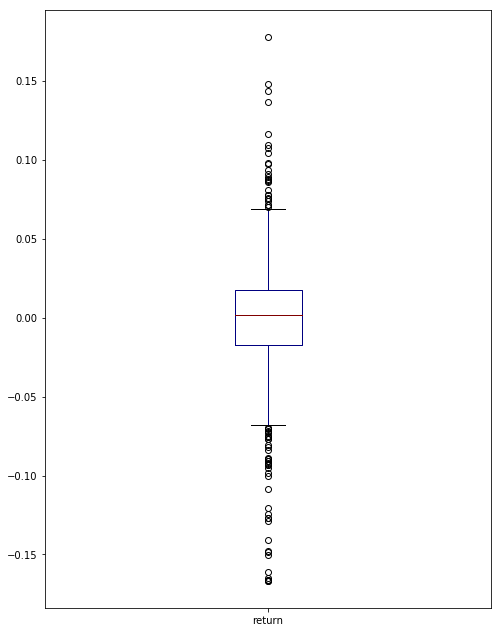

In [15]:
andstock['return'].plot(kind='box',figsize=(8,11),colormap='jet')

In [16]:
andstock['Cumulative Return'] = (1 + andstock['return']).cumprod()

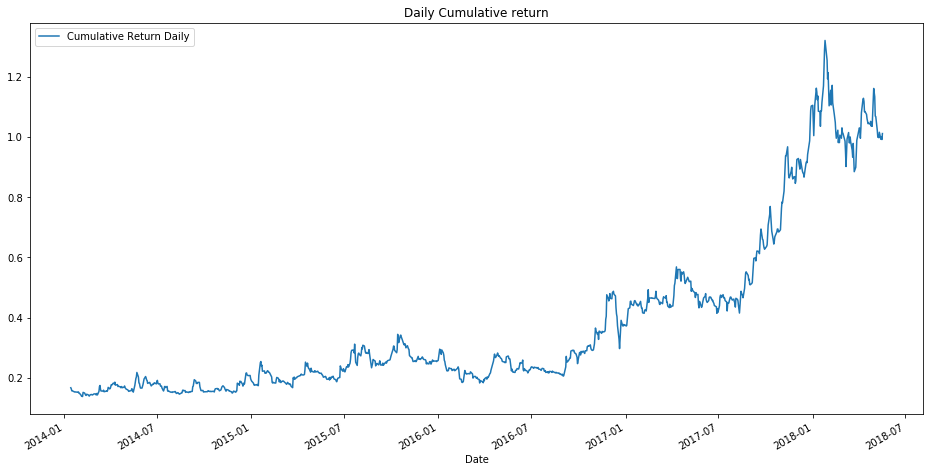

In [17]:
andstock['Cumulative Return'].plot(label ='Cumulative Return Daily',figsize=(16,8),title='Daily Cumulative return')
plt.legend()